In [1]:
#| default_exp app

In [1]:
#| export
from fastai.vision.all import *
import gradio as gr
import timm

/Users/hb/Desktop/Projects/FastAI/art-classifier-folder/comic-medium-classifier/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


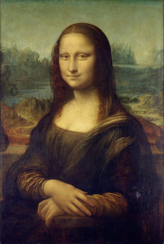

In [2]:
im = PILImage.create('images/renaissance_art.jpg')
im.thumbnail((244, 244))
im

In [12]:
#| export
learn = load_learner('model.pkl')

In [13]:
learn.predict(im)

('Renaissance',
 tensor(8),
 tensor([4.1230e-05, 9.3802e-08, 1.8678e-03, 3.3654e-07, 3.1933e-07, 7.1541e-04,
         3.0829e-06, 5.6260e-05, 9.9574e-01, 1.7258e-04, 1.3690e-03, 2.6101e-05,
         4.1802e-06]))

In [14]:
#| export
categories = ('Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 
              'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Western_Medieval')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [6]:
classify_image(im)

{'Academic_Art': 4.1230498027289286e-05,
 'Art_Nouveau': 9.380215004739512e-08,
 'Baroque': 0.0018677680054679513,
 'Expressionism': 3.3653790865173505e-07,
 'Japanese_Art': 3.1933464583744353e-07,
 'Neoclassicism': 0.0007154132472351193,
 'Primitivism': 3.082929652009625e-06,
 'Realism': 5.626030906569213e-05,
 'Renaissance': 0.9957435727119446,
 'Rococo': 0.00017257999570574611,
 'Romanticism': 0.0013690447667613626,
 'Symbolism': 2.610099545563571e-05,
 'Western_Medieval': 4.180151790933451e-06}

In [15]:
#| export
image = gr.Image(height=224, width=224)
label = gr.Label()
examples = ['images/renaissance_art.jpg', 'images/baroque_art.jpg', 
            'images/romanticism_art.jpg', 'images/realism_art.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------


In [16]:
m = learn.model

# Export Notebook

In [2]:
from nbdev.export import nb_export

In [3]:
nb_export('app.ipynb', '.')